# membuat graph untuk data facebook

In [ ]:
!pip uninstall -y community
!pip install python-louvain


Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain


In [ ]:
file_path = "/content/facebook_combined.txt"
G = nx.read_edgelist(file_path, nodetype=int)

print("Total Node:", G.number_of_nodes())
print("Total Edge:", G.number_of_edges())


Total Node: 4039
Total Edge: 88234


In [ ]:
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))

print("Total Komunitas Terdeteksi:", num_communities)


Total Komunitas Terdeteksi: 16


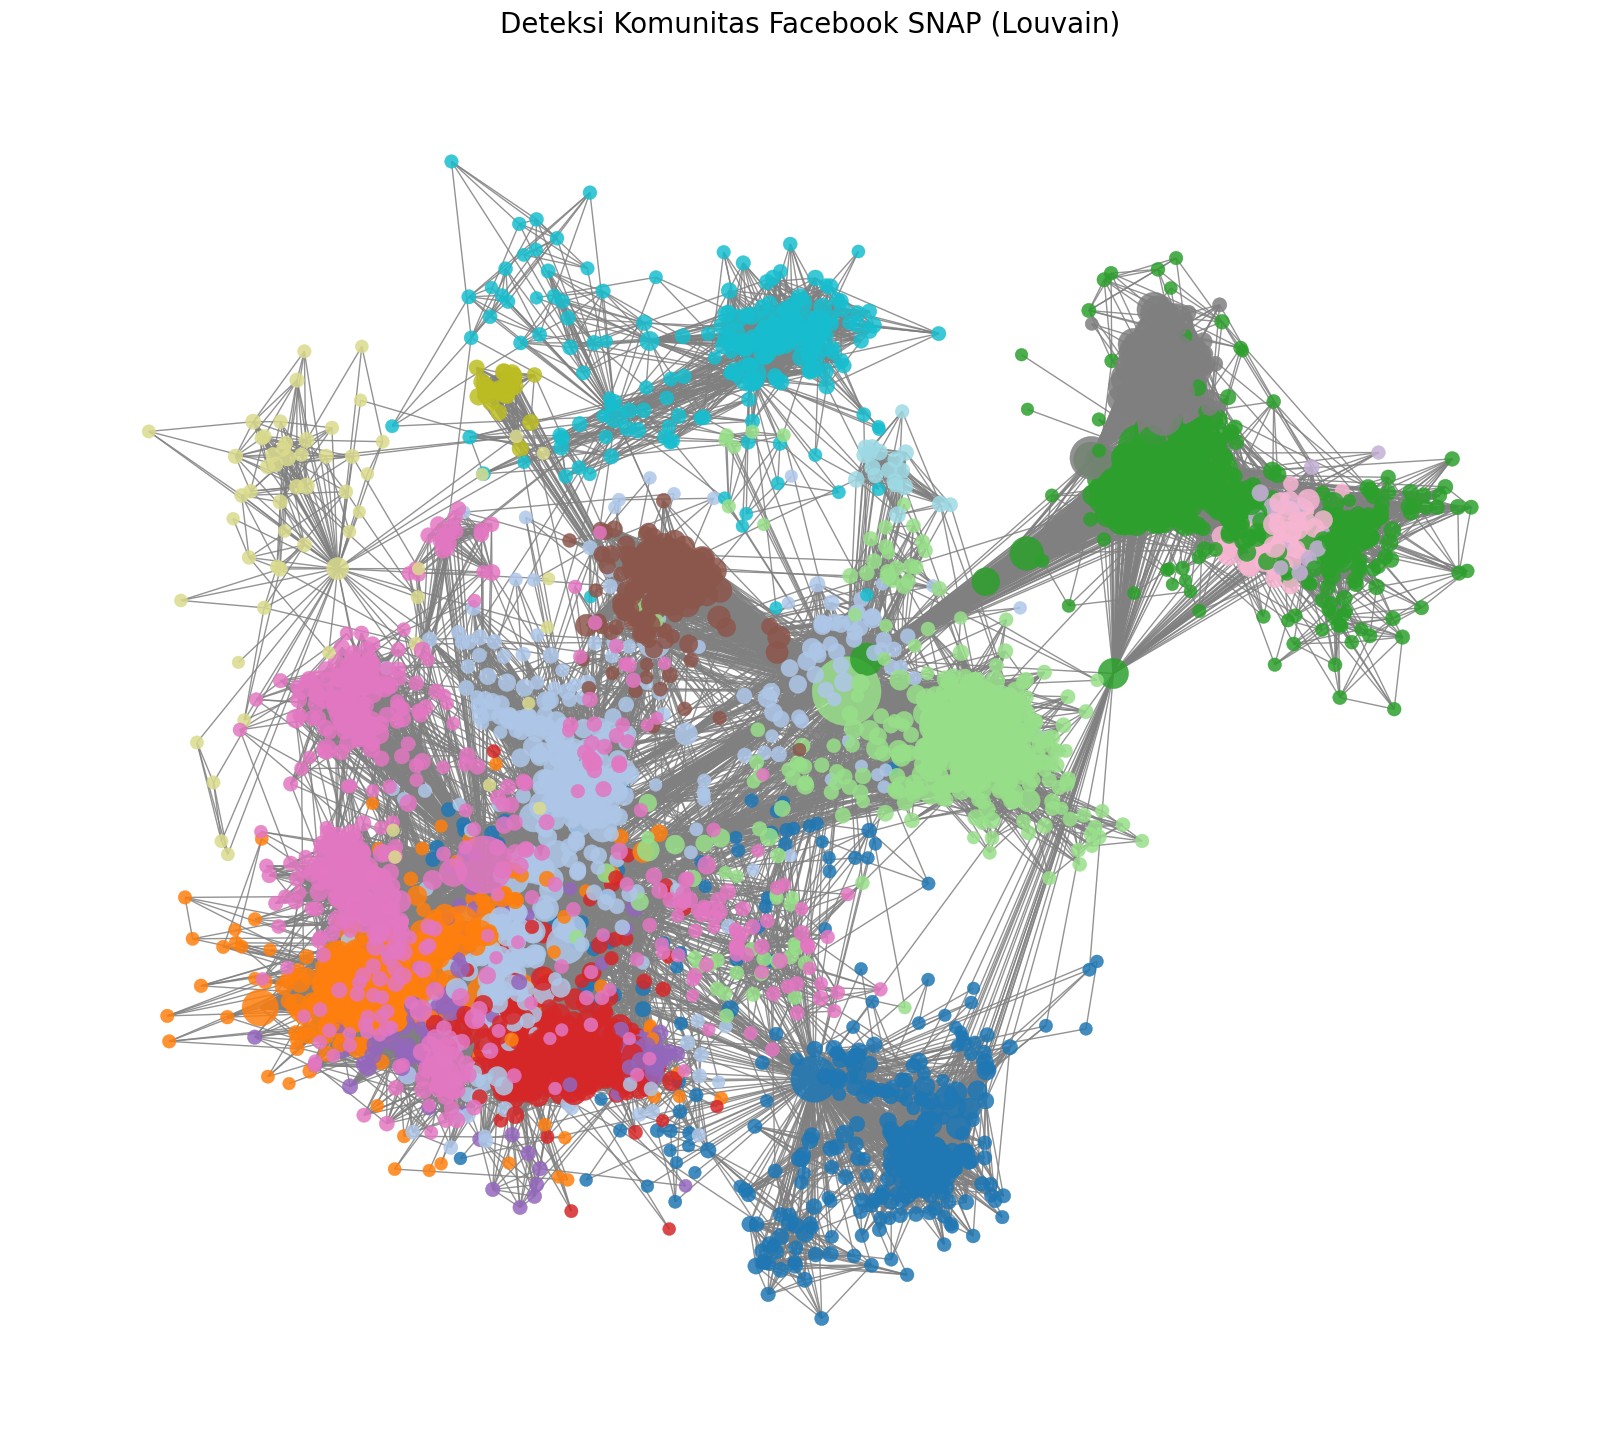

In [ ]:
pos = nx.spring_layout(G, k=0.15, iterations=50)

color_map = [partition[n] for n in G.nodes()]
sizes = [80 + G.degree(n)*3 for n in G.nodes()]

plt.figure(figsize=(16,14))
nx.draw(
    G, pos,
    node_color=color_map,
    cmap=plt.cm.tab20,
    node_size=sizes,
    alpha=0.85,
    edge_color="gray",
    linewidths=0.3,
    with_labels=False
)

plt.title("Deteksi Komunitas Facebook SNAP (Louvain)", fontsize=20)
plt.axis("off")
plt.show()


In [ ]:
deg = dict(G.degree())
sorted_deg = sorted(deg.items(), key=lambda x: x[1], reverse=True)
sorted_deg[:10]
#(node ,degree(hubungan) )


[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254),
 (1800, 245),
 (1663, 235)]

In [ ]:
from collections import Counter

community_count = Counter(partition.values())

print("Jumlah anggota (node) untuk setiap komunitas:")
for community_id, count in community_count.items():
    print(f"Komunitas {community_id}: {count} anggota")

Jumlah anggota (node) untuk setiap komunitas:
Komunitas 0: 350 anggota
Komunitas 1: 433 anggota
Komunitas 2: 435 anggota
Komunitas 3: 423 anggota
Komunitas 4: 535 anggota
Komunitas 5: 321 anggota
Komunitas 6: 129 anggota
Komunitas 9: 548 anggota
Komunitas 10: 73 anggota
Komunitas 11: 237 anggota
Komunitas 12: 25 anggota
Komunitas 13: 60 anggota
Komunitas 14: 206 anggota
Komunitas 8: 226 anggota
Komunitas 15: 19 anggota
Komunitas 7: 19 anggota


In [ ]:
modularity_score = community_louvain.modularity(partition, G)
print(f"Modularity score: {modularity_score}")

Modularity score: 0.8349652587713134


Komunitas Terbesar adalah ID: 9
Jumlah Anggota: 548 node
------------------------------
10 Anggota pertama: [1085, 3437, 3454, 3487, 3723, 3861, 3961, 857, 862, 865, 868, 3456, 3495, 3586, 3621, 3626, 3797, 3501, 3517, 3550, 3577, 3592, 3609, 3633, 3677, 3684, 3721, 3779, 3872, 3948, 3440, 3525, 3540, 3556, 3561, 3651, 3674, 3692, 3741, 3750, 3756, 3830, 3851, 3877, 3886, 3943, 3962, 3438, 3439, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3455, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3496, 3497, 3498, 3499, 3500, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3

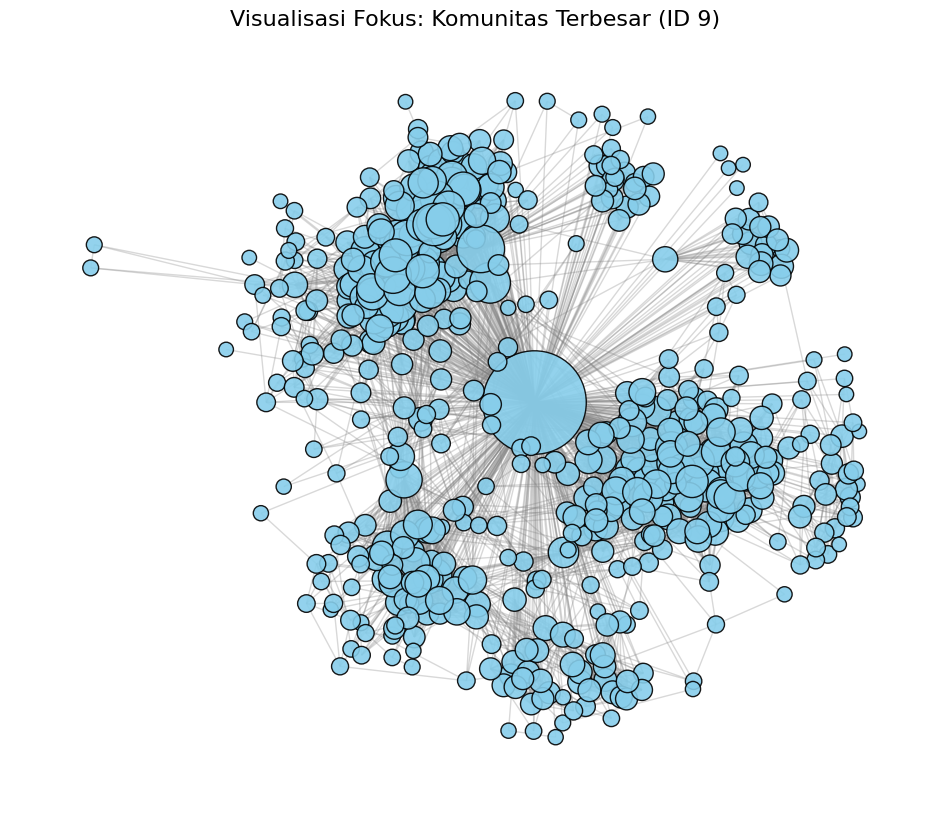

In [ ]:
from collections import Counter

# --- 1. MENCARI KOMUNITAS TERBESAR ---

# Menghitung jumlah node di setiap komunitas
# partition.values() berisi ID komunitas untuk setiap node
counts = Counter(partition.values())

# Mendapatkan ID komunitas dengan jumlah anggota terbanyak
max_com_id = max(counts, key=counts.get)
max_com_size = counts[max_com_id]

# Mendapatkan list node yang menjadi anggota komunitas terbesar
members_largest = [node for node, com in partition.items() if com == max_com_id]

print(f"Komunitas Terbesar adalah ID: {max_com_id}")
print(f"Jumlah Anggota: {max_com_size} node")
print("-" * 30)
print(f"10 Anggota pertama: {members_largest[:]} ...")
print("-" * 30)

# --- 2. VISUALISASI KHUSUS KOMUNITAS TERBESAR ---

# Membuat subgraph yang hanya berisi node dari komunitas terbesar
G_largest = G.subgraph(members_largest)

# Mengatur layout ulang agar visualisasi fokus dan rapi
pos_largest = nx.spring_layout(G_largest, k=0.15, iterations=50, seed=42)

# Menentukan ukuran node berdasarkan derajatnya di dalam subgraph ini
sizes_largest = [100 + G_largest.degree(n) * 10 for n in G_largest.nodes()]

plt.figure(figsize=(12, 10))

# Menggambar edges
nx.draw_networkx_edges(G_largest, pos_largest, alpha=0.3, edge_color="gray")

# Menggambar nodes
nx.draw_networkx_nodes(
    G_largest,
    pos_largest,
    node_size=sizes_largest,
    node_color="skyblue",  # Satu warna karena ini satu komunitas
    alpha=0.9,
    edgecolors="black"     # Garis tepi node agar lebih tegas
)

# Opsi: Menampilkan label jika jumlah node tidak terlalu masif (misal < 100)
# Jika node ribuan, lebih baik with_labels=False agar tidak berantakan
show_labels = True if len(members_largest) < 100 else False
if show_labels:
    nx.draw_networkx_labels(G_largest, pos_largest, font_size=8)

plt.title(f"Visualisasi Fokus: Komunitas Terbesar (ID {max_com_id})", fontsize=16)
plt.axis("off")
plt.show()